## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
# X[0]

In [ ]:
X.loc[0:2]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isnull().sum().sum()

0

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
np.random.seed(125)

from sklearn.model_selection import train_test_split
X2 = X[['alcohol', 'magnesium']]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def mydist(x, y):
  return np.sum((x-y)**2)

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf2.fit(X_train_norm, y_train)
y_predicted = clf2.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.7592592592592593

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1, weights='distance')
clf1.fit(X_train_norm, y_train)
y_predicted = clf1.predict(X_test_norm)

clf5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf5.fit(X_train_norm, y_train)
y_predicted = clf5.predict(X_test_norm)

clf10 = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf10.fit(X_train_norm, y_train)
y_predicted = clf10.predict(X_test_norm)

clf15 = KNeighborsClassifier(n_neighbors=15, weights='distance')
clf15.fit(X_train_norm, y_train)
y_predicted = clf15.predict(X_test_norm)

clf25 = KNeighborsClassifier(n_neighbors=25, weights='distance')
clf25.fit(X_train_norm, y_train)
y_predicted = clf25.predict(X_test_norm)

In [ ]:
for k in range(1, 26):
    y_predicted = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train_norm, y_train).predict(X_test_norm)
    print(f"k = {k}; accuracy = {np.mean(y_predicted==y_test):.3f}")

k = 1; accuracy = 0.741
k = 2; accuracy = 0.741
k = 3; accuracy = 0.759
k = 4; accuracy = 0.778
k = 5; accuracy = 0.759
k = 6; accuracy = 0.759
k = 7; accuracy = 0.759
k = 8; accuracy = 0.741
k = 9; accuracy = 0.741
k = 10; accuracy = 0.722
k = 11; accuracy = 0.722
k = 12; accuracy = 0.759
k = 13; accuracy = 0.759
k = 14; accuracy = 0.704
k = 15; accuracy = 0.741
k = 16; accuracy = 0.722
k = 17; accuracy = 0.741
k = 18; accuracy = 0.685
k = 19; accuracy = 0.704
k = 20; accuracy = 0.685
k = 21; accuracy = 0.685
k = 22; accuracy = 0.704
k = 23; accuracy = 0.704
k = 24; accuracy = 0.685
k = 25; accuracy = 0.685


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
type(y_train)

numpy.ndarray

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

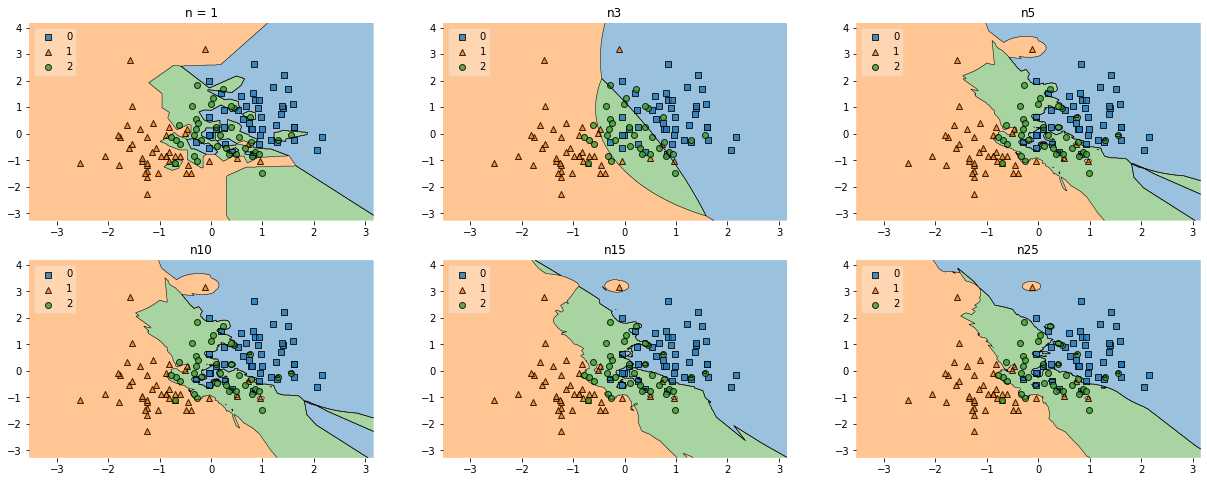

In [ ]:
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = clf1
clf2 = clf3
clf4 = clf5
clf5 = clf10
clf6 = clf15
clf7 = clf20
# Loading some example data

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
fig = plt.figure(figsize=(21, 8))
gs = gridspec.GridSpec(2, 3, fig)

labels = ['n = 1', 'n3', 'n5', 'n10', 'n15', 'n25']
for clf, lab, grd in zip([clf1, clf2, clf4, clf5, clf6, clf7],
                         labels, itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train_norm, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_norm, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf4 = KNeighborsClassifier(n_neighbors=15)
clf4 = KNeighborsClassifier(n_neighbors=25)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [ ]:
X_train = X1[['proline', 'color_intensity']].values

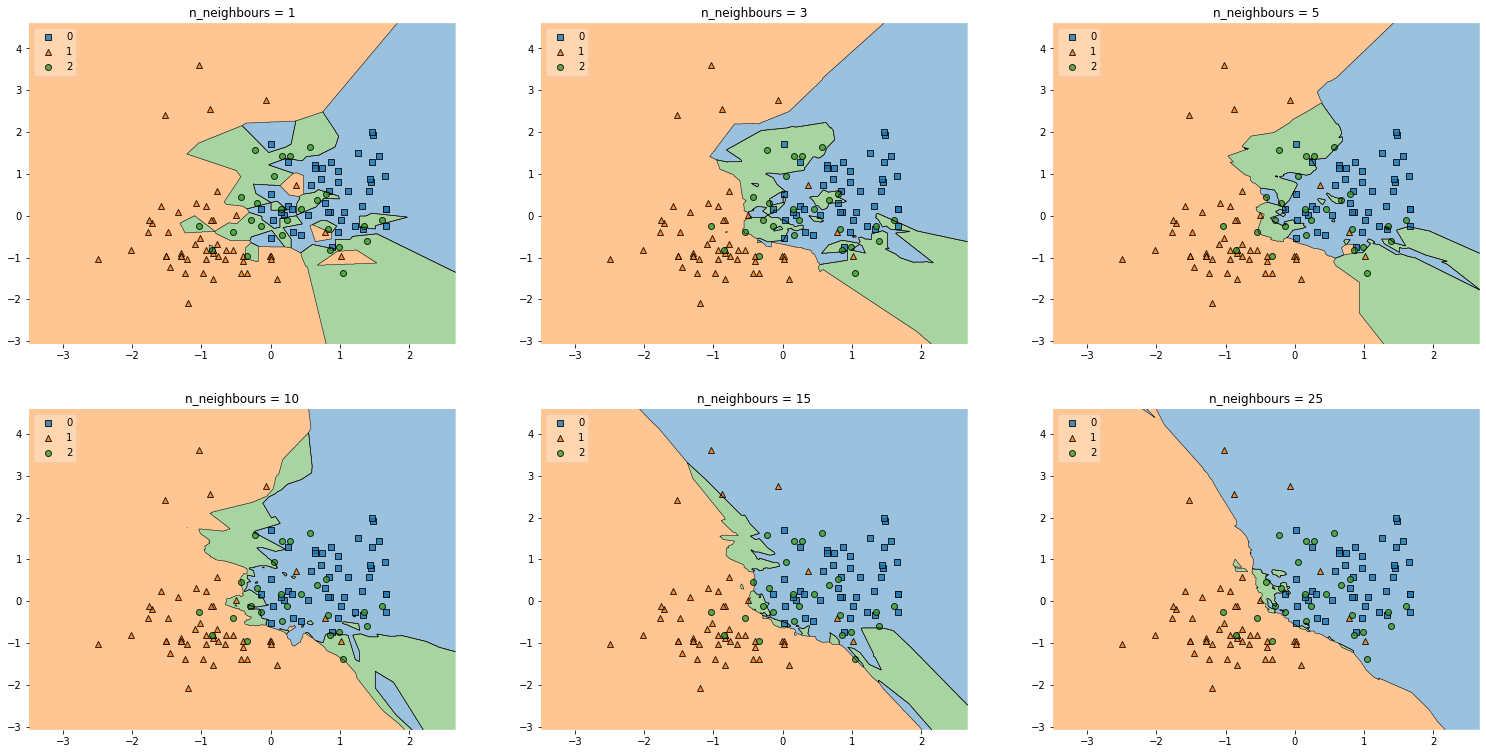

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

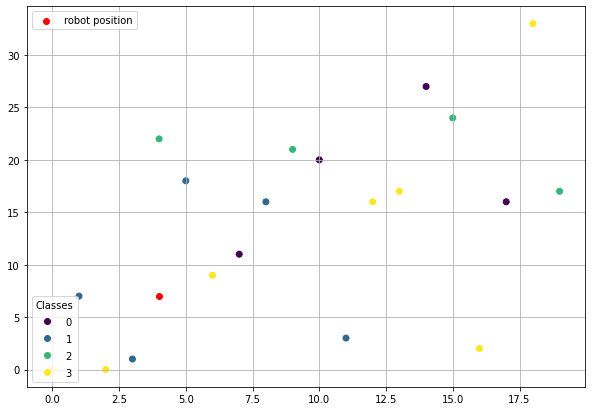

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Parameters:
        -----------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position.copy()]
        
        self.pos = initial_position.copy()
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, p=2).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        go_right = np.random.binomial(1, 0.2) #беру биномиальное так как наш пример с подбрасыванием монетки относится к этому распределению
        
        if go_right:
            self.pos += self.mapping[0]
            self.trajectory.append(self.pos.copy())
        else:
            pred = self.knn.predict(self.pos[np.newaxis, :])[0]
            self.pos += self.mapping[pred]
            self.trajectory.append(self.pos.copy())

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj =traj = np.array([[pos[0], pos[1]] for pos in robot.trajectory])
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

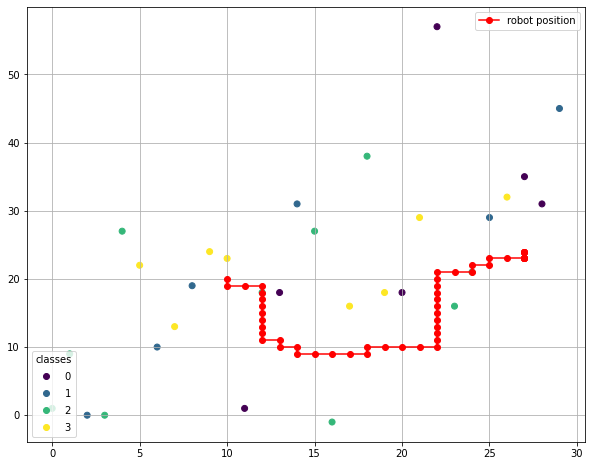

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

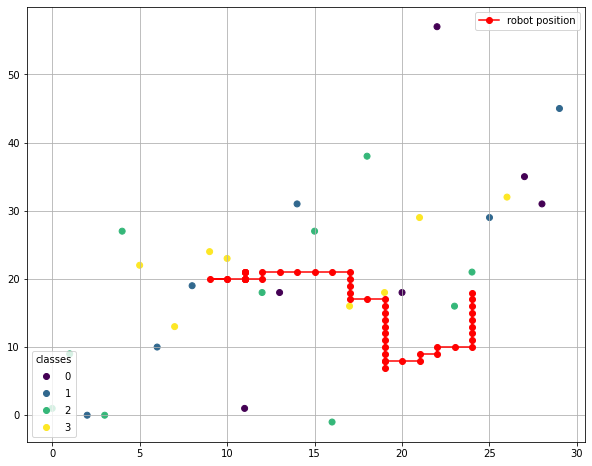

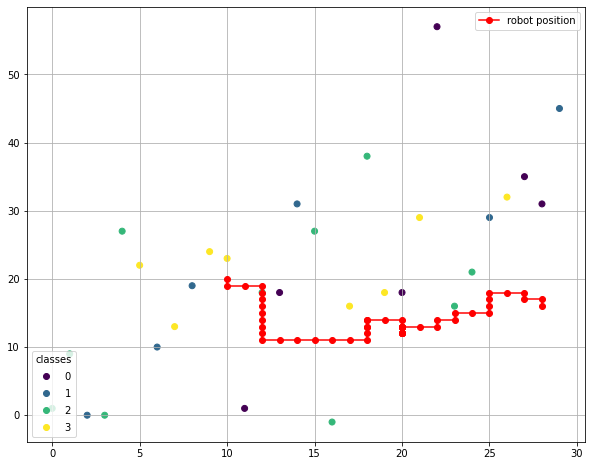

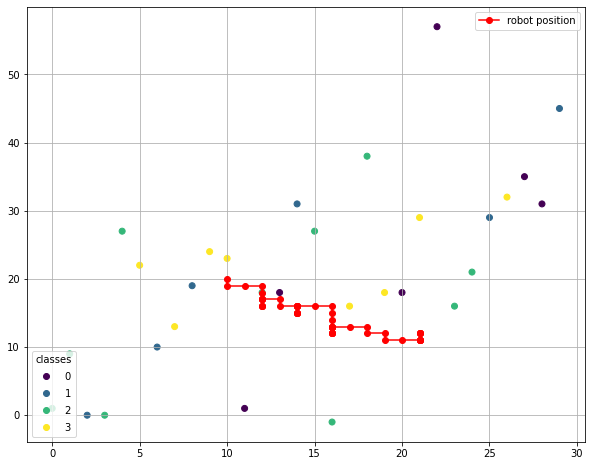

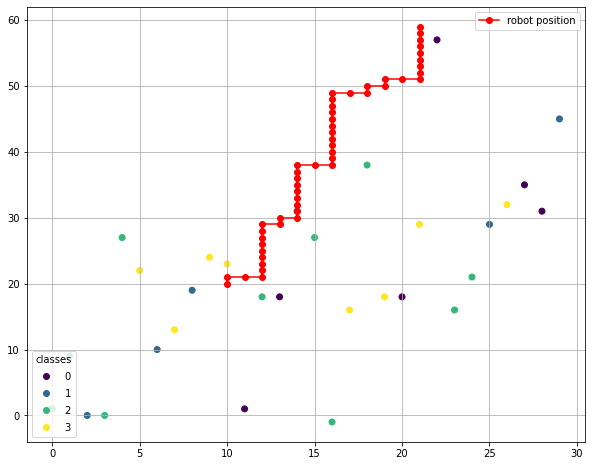

In [ ]:
x = np.arange(30)
for k in [1, 10, 20, 30]:
    conduct_experiment(x, mean=3, std=10, k=k, n_movements=50)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isnull().sum().sum()

0

как видим, пропусков нет. Это можно так же проверить тепловой картой.

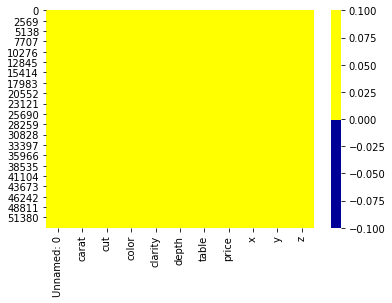

In [ ]:
import seaborn as sns
cols = data.columns #берем колонки сета
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours)) #строим хитмеп, задаем колонки и опередяем где есть нули, задаем цветовую гамму которую определили строкой выше

In [ ]:
# data.dropna(inplace=True)

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop(["Unnamed: 0"],axis=1)
#data.head() 

постараемся нати выбросы или неординарные знаяени в данных, для этого построим пейрплот

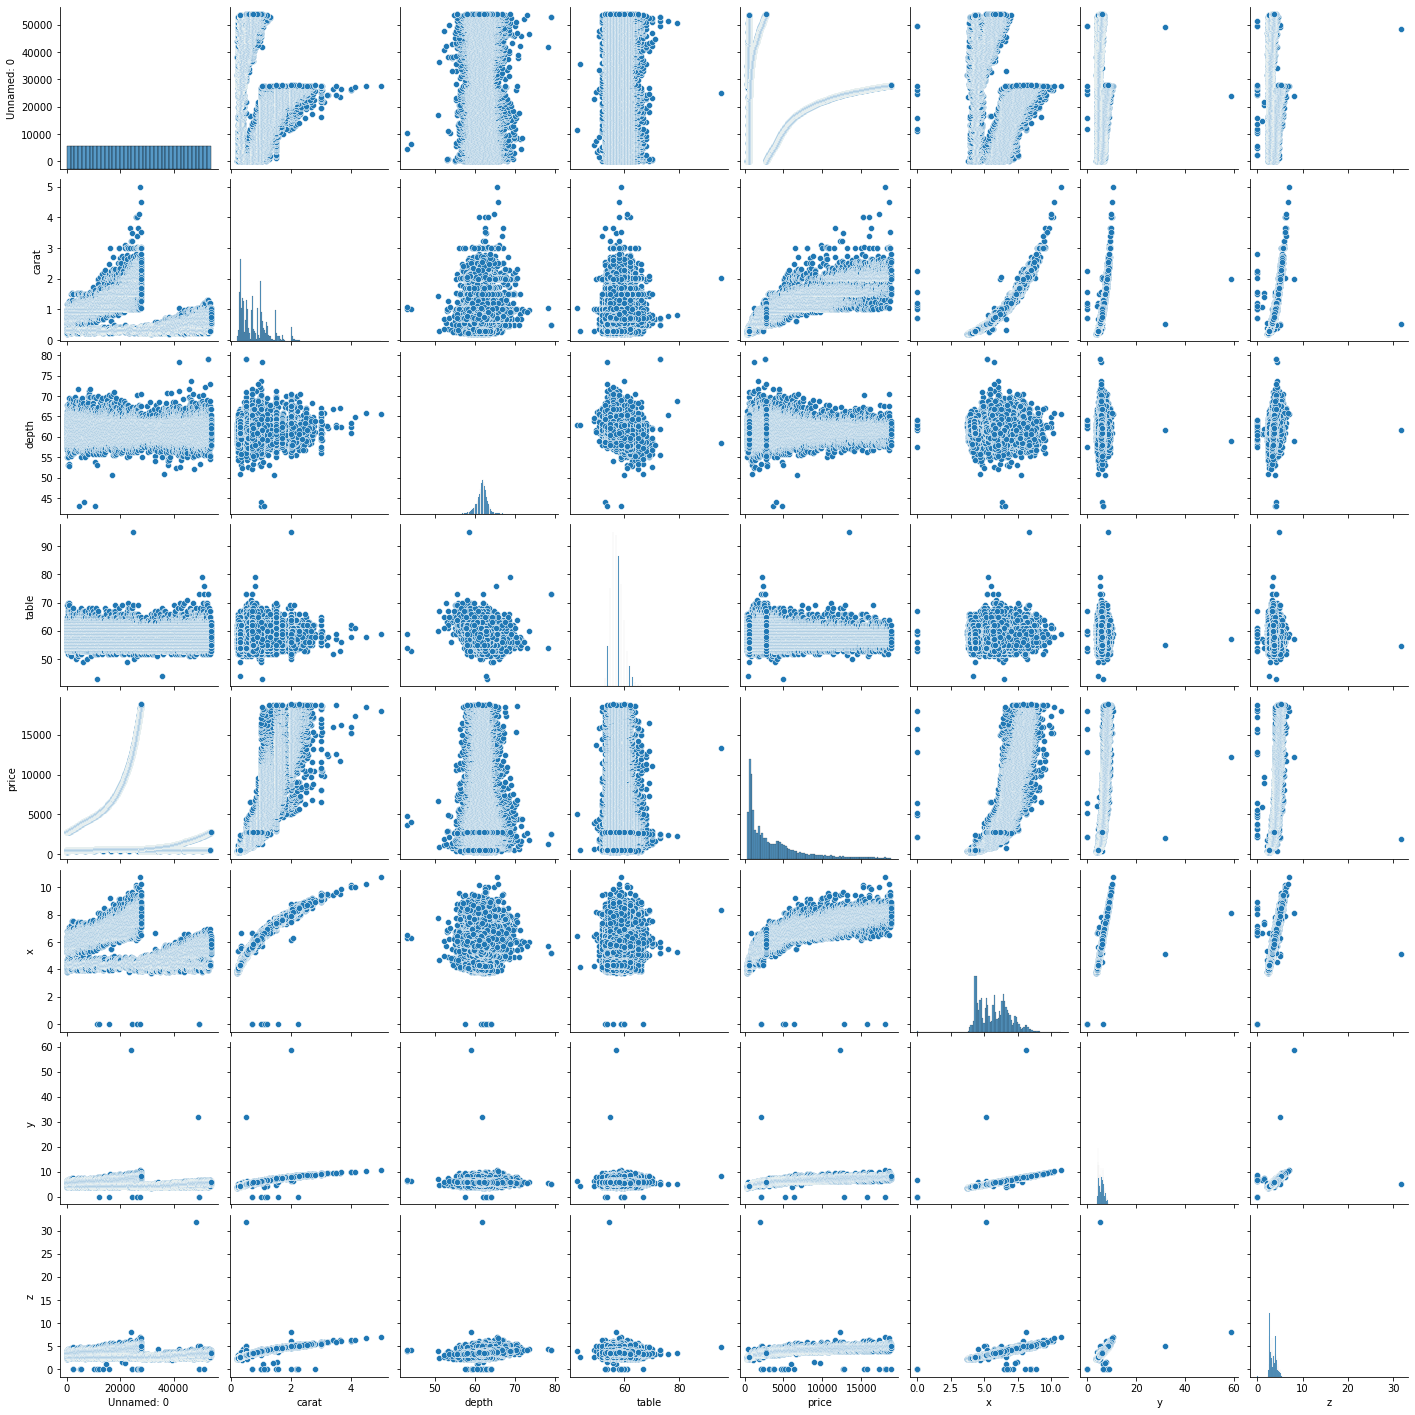

In [ ]:
sns.pairplot(data=data)

видим, что существуют признаки, где х, y или z равны 0. уберем их

In [ ]:
data = data.loc[data['x'] != 0]
data = data.loc[data['y'] != 0]
data = data.loc[data['z'] != 0]

In [ ]:
data.shape

(53920, 24)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

цена коррелирует с каратами и размером (x, y, z)


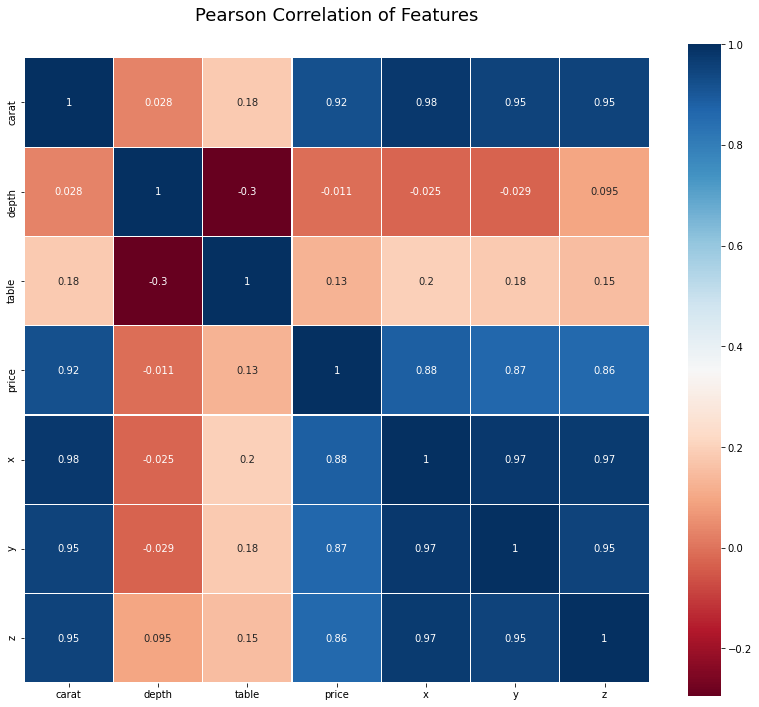

In [ ]:
#данный хитмеп представлен на уже закодированных признаках 
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data.shape

(53940, 10)

In [ ]:
data = pd.get_dummies(data, drop_first=True, sparse=True)
print(data.shape)
data.head()

(53920, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
np.random.seed(12345)

from sklearn.model_selection import train_test_split
X = data.drop('price', 1).values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_norm, y_train)
 
print(f'MAE on Train: {mean_absolute_error(y_train, regr.predict(X_train_norm))}')
print(f'MAE on Test: {mean_absolute_error(y_test, regr.predict(X_test_norm))}')

print(f'MSE on Train: {mean_squared_error(y_train, regr.predict(X_train_norm))}')
print(f'MSE on Test: {mean_squared_error(y_test, regr.predict(X_test_norm))}')

MAE on Train: 733.9933148124189
MAE on Test: 746.4293786880745
MSE on Train: 1266104.6473758263
MSE on Test: 1882262.4451905058


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
print(regr.coef_, regr.intercept_)

[ 5439.46346468    57.38852776   -52.81222496 -1807.32551104
  1773.10375198 -1257.12699612   133.62269561   356.95927552
   305.69837402   250.51446134   -86.34711667   -99.92047201
  -197.56807878  -355.81338322  -446.68039791  -524.4192123
   952.65153502  1546.82271699  1004.80714915  1617.03534217
  1770.5723004   1253.81043243  1417.66403601] 3920.1774056803115


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as mae
model = linear_model.Lasso(alpha=10)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))


Mean absolute error: 750.4662149307558


In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=10)
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))

Mean absolute error: 744.9862188039865


In [ ]:
print(model.coef_, model.intercept_)

[4891.59826844  -30.94389123  -66.35427221 -161.626811     -0.
 -618.56489655   35.17705949  187.68355901  129.28079918  124.03827924
  -15.85656795  -33.92198829 -120.98118552 -285.76275763 -373.58852381
 -462.69999364  638.09051802  810.5394686   361.0441038   997.05488544
 1050.74757355  819.46463224  920.68243009] 3920.177405680306


In [ ]:
print(clf.coef_, clf.intercept_)

[ 5393.26553169    43.10324213   -53.89174208 -1504.00834391
  1396.53873742 -1137.89340461   140.40180661   366.97235825
   309.95588567   262.15232535   -85.87259352   -99.6650956
  -197.16538895  -355.31698168  -445.10556892  -522.80943109
   942.07655646  1519.40759603   980.94410224  1594.57720548
  1744.0213418   1238.71274708  1400.0914797 ] 3920.1774056803106


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16969481969.206528, tolerance: 59501599.262809135
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1180156240.6267471, tolerance: 59501599.262809135
  positive)


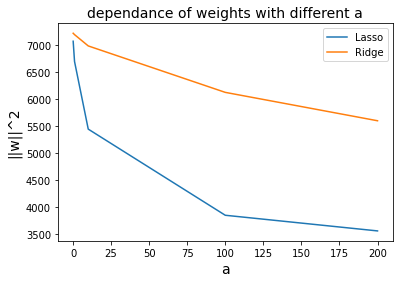

In [ ]:
a = [0.1, 1, 10, 100, 200] #создаем список альф
#LASSO
a_lasso = [] #создаем пустой список, куда будм добавлять коэфициенты
for i in a: #проходим циклом по альфам 
  model = linear_model.Lasso(alpha=i)
  model.fit(X_train_norm, y_train)
  a_lasso.append(np.linalg.norm(model.coef_))

#RIDGE
a_ridge = []
for i in a:
  clf = Ridge(alpha=i)
  clf.fit(X_train_norm, y_train)
  a_ridge.append(np.linalg.norm(clf.coef_))

#построим график
fig, ax = plt.subplots()

ax.plot(a, a_lasso, label='Lasso')
ax.plot(a, a_ridge, label='Ridge')


fontsize = 14
ax.set_xlabel('a', size=fontsize)
ax.set_ylabel('||w||^2', size=fontsize)
ax.set_title('dependance of weights with different a', size=fontsize)
ax.legend()

как видим, Ridge гораздо агрессивнее уменьшает веса

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
# for i in range(10, 100):
  # print(i)

In [ ]:
from sklearn.linear_model import LassoCV
als = [1, 3, 5, 10, 15, 25]
LCV = LassoCV(n_alphas=100, alphas=als, cv=5)
LCV.fit(X_train_norm, y_train)
y_pred = LCV.predict(X_test_norm)

best_alpha = LCV.alphas_[LCV.mse_path_.mean(axis=1).argmin()]
best_alpha


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490262551.05540466, tolerance: 47200995.798646644
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752520844.0102463, tolerance: 47336544.87687628
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1541469735.3485794, tolerance: 47455716.54614356
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to inc

1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
Lasso =linear_model.Lasso(best_alpha)
Lasso.fit(X_train_norm, y_train)
print(Lasso.coef_, Lasso.intercept_)

[ 5.38466272e+03  4.54786904e+00 -5.79864204e+01 -1.01195710e+03
  6.62119989e+02 -8.86155497e+02  1.37874494e+02  3.58232828e+02
  2.93017944e+02  2.60850533e+02 -7.91222495e+01 -9.30301513e+01
 -1.90075166e+02 -3.49703028e+02 -4.38838028e+02 -5.17829334e+02
  9.26015254e+02  1.48198408e+03  9.46768216e+02  1.56300842e+03
  1.70701645e+03  1.21619448e+03  1.37479376e+03] 3920.1774056803124


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1180156240.6267471, tolerance: 59501599.262809135
  positive)


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
print(f'LASSO test: {mean_squared_error(y_test, Lasso.predict(X_test_norm))}')
print(f'Linear regression test: {mean_squared_error(y_test, regr.predict(X_test_norm))}')

LASSO test: 1400301.9715551706
Linear regression test: 1882262.4451905058


Lasso лучше справляется с решением. 